In this notebook, we aim to create the sensitivity and discovery potential plots comparing this analysis to previous FRB analyses. To obtain the data from the previous FRB analyses and plot it, we have digitized the plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import argparse
import histlite as hl
import csky as cy

ana_dir = cy.utils.ensure_dir('/data/user/mkovacevich/FRB_analysis/cascades_ana')
repo = cy.selections.Repository()
ana = cy.get_analysis(repo, cy.selections.MESEDataSpecs.mesc_7yr, dir=ana_dir)

cy.plotting.mrichman_mpl()

/home/mkovacevich/py3venv/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Setting up Analysis for:
MESC_2010_2016
Setting up MESC_2010_2016...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_MC.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/

/home/mkovacevich/py3venv/lib/python3.7/site-packages/csky/plotting.py:92: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\SetSymbolFont{operators}   {sans}{OT1}{cmss} {m}{n}'


The cell below will load the fluxes for this analysis (both catalogs) as well as the digitized fluxes for a spectrum of gamma = 3

In [4]:
time_windows = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0]

#Loading the main catalog fluxes
sens_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/Sensitivity_gamma_equals_3.npy', allow_pickle = True)
disc_pot_nsigma_3_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/Dis_pot_nsigma_3_gamma_equals_3.npy', allow_pickle = True)
disc_pot_nsigma_5_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/Dis_pot_nsigma_5_gamma_equals_3.npy', allow_pickle = True)

disc_pot_nsigma_3_gamma_equals_3_extendedtimewindows = np.load('./Sensitivity_DiscoveryPotentials/Dis_pot_nsigma_3_gamma_equals_3_extended_timewindows.npy', allow_pickle = True)
disc_pot_nsigma_5_gamma_equals_3_extendedtimewindows = np.load('./Sensitivity_DiscoveryPotentials/Dis_pot_nsigma_5_gamma_equals_3_extended_timewindows.npy', allow_pickle = True)

disc_pot_nsigma_3_gamma_equals_3 = np.concatenate((disc_pot_nsigma_3_gamma_equals_3[:9],disc_pot_nsigma_3_gamma_equals_3_extendedtimewindows))
disc_pot_nsigma_5_gamma_equals_3 = np.concatenate((disc_pot_nsigma_5_gamma_equals_3[:9], disc_pot_nsigma_5_gamma_equals_3_extendedtimewindows))

#Converting to energy-scaled flux per burst
Num_FRBs = 22
sens_gamma_equals_3_perFRB = [x / Num_FRBs for x in sens_gamma_equals_3]
three_sigma_gamma_equals_3_perFRB = [x / Num_FRBs for x in disc_pot_nsigma_3_gamma_equals_3]
five_sigma_gamma_equals_3_perFRB = [x / Num_FRBs for x in disc_pot_nsigma_5_gamma_equals_3]

#Loading the FRB121102 catalog fluxes (nsigma_3 refers to the 3 sigma discovery potential)
FRB121102_sens_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/FRB_121102_gamma_3_sens.npy', allow_pickle = True)
FRB121102_disc_pot_nsigma_3_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/Dis_pot_nsigma_3_gamma_equals_3.npy', allow_pickle = True)
FRB121102_disc_pot_nsigma_5_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/Dis_pot_nsigma_5_gamma_equals_3.npy', allow_pickle = True)

#converting to energy-scaled flux per burst
Num_FRB_121102 = 26
sens_gamma_equals_3_perFRB121102 = [x / Num_FRB_121102 for x in FRB121102_disc_pot_nsigma_3_gamma_equals_3]
three_sigma_gamma_equals_3_perFRB121102 = [x / Num_FRB_121102 for x in FRB121102_disc_pot_nsigma_3_gamma_equals_3]
five_sigma_gamma_equals_3_perFRB121102 = [x / Num_FRB_121102 for x in FRB121102_disc_pot_nsigma_5_gamma_equals_3]

#Calculating the flux ratio between the two catalogs
catalog_sens_ratio_gamma_equals_3 = np.divide(sens_gamma_equals_3_perFRB121102, sens_gamma_equals_3_perFRB)
catalog_nsigma_3_ratio_gamma_equals_3 = np.divide(three_sigma_gamma_equals_3_perFRB121102, three_sigma_gamma_equals_3_perFRB)
catalog_nsigma_5_ratio_gamma_equals_3 = np.divide(five_sigma_gamma_equals_3_perFRB121102, five_sigma_gamma_equals_3_perFRB)



#Loading sensitivity for gamma = 3 (L2P2 and 6 year tracks are digitized as per FRB - no need to convert)
L2P2_sens_gamma_equals_3_time = np.load('./Sensitivity_DiscoveryPotentials/L2P2_sens_gamma_equals_3_time.npy', allow_pickle = True)
L2P2_sens_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/L2P2_sens_gamma_equals_3.npy', allow_pickle = True)

Tracks_6yr_sens_gamma_equals_3_time = np.load('./Sensitivity_DiscoveryPotentials/6yr_sens_gamma_equals_3_time.npy', allow_pickle = True)
Tracks_6yr_sens_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/6yr_sens_gamma_equals_3.npy', allow_pickle = True)

#Saving the sensitivity ratios 
L2P2_sens_ratio_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/L2P2_sens_ratio_gamma_equals_3_time.npy', allow_pickle = True)
Tracks_6yr_sens_ratio_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/6yr_sens_ratio_gamma_equals_3.npy', allow_pickle = True)

#Saving the values used to calculate the sensitivity ratios
L2P2_sens_ratio_values_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/L2P2_sens_values_for_ratio_gamma_equals_3_time.npy', allow_pickle = True)
Tracks_6yr_sens_ratio_values_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/6yr_sens_values_for_ratio_gamma_equals_3.npy', allow_pickle = True)

Below, we produce the E^-3 sensitivity plot with L2P2 and 6 year southern tracks datasets

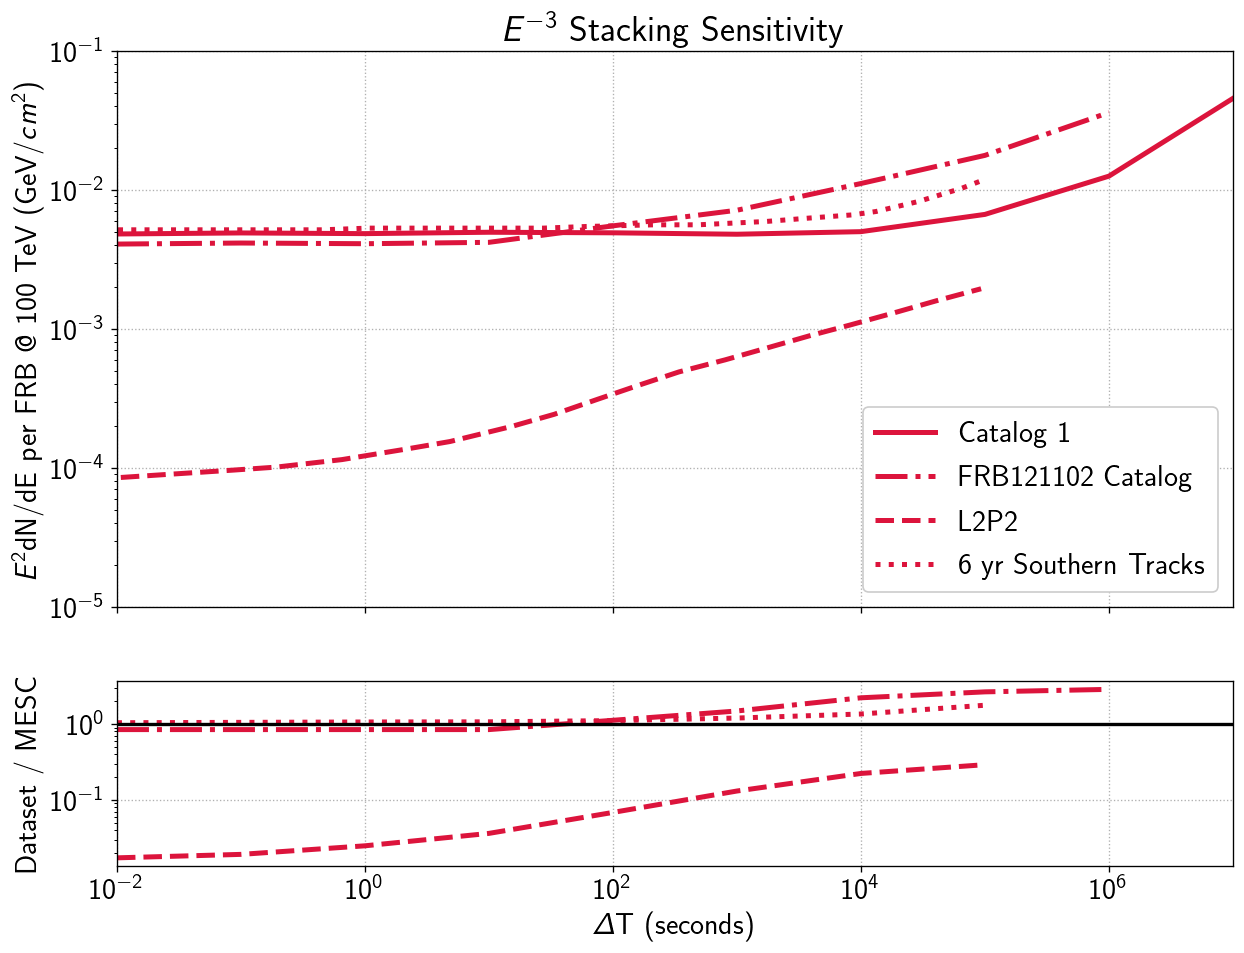

In [8]:
plt.rcParams.update({'font.size': 18})
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
ax1.plot(time_windows, sens_gamma_equals_3_perFRB, color = 'crimson', lw = 3, label = 'Catalog 1')

ax1.plot(time_windows, sens_gamma_equals_3_perFRB121102, color = 'crimson', linestyle='dashdot', lw = 3, label = 'FRB121102 Catalog')

ax1.plot(L2P2_sens_gamma_equals_3_time, L2P2_sens_gamma_equals_3,  color = 'crimson', linestyle='--', lw = 3,label = r'L2P2')

ax1.plot(Tracks_6yr_sens_gamma_equals_3_time, Tracks_6yr_sens_gamma_equals_3,  color = 'crimson', linestyle=':', lw = 3, label = r'6 yr Southern Tracks')

ax1.set_ylim(.00001, 0.1)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel(r'$E^{2}$dN/dE per FRB @ 100 TeV (GeV/$cm^{2}$)')
ax1.grid(True)
ax1.set_title(r'$E^{-3}$ Stacking Sensitivity')
ax1.patch.set_facecolor('white')
ax1.legend(loc = 'lower right', framealpha = 1)

ax2.plot(time_windows[:8], L2P2_sens_ratio_gamma_equals_3, color = 'crimson', linestyle='--', lw = 3, label = 'L2P2')
ax2.plot(time_windows[:8], Tracks_6yr_sens_ratio_gamma_equals_3, color = 'crimson', linestyle=':',lw = 3,label = '6 yr Southern Tracks')
ax2.plot(time_windows, catalog_sens_ratio_gamma_equals_3, color = 'crimson', linestyle='dashdot',lw = 3,label = '6 yr Southern Tracks')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(1e-2, 1e7)
ax2.axhline(y=1., color = 'black')
ax2.grid()
ax2.set_ylabel('Dataset / MESC')
ax2.set_xlabel(r'$\Delta$T (seconds)' )

fig.patch.set_facecolor('white')
fig.savefig('/home/mkovacevich/public_html/Qual/E3_Stacking_Sensitivity.png', bbox_inches='tight')

Loading fluxes for gamma = 2

In [10]:
sens_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/Sensitivity_gamma_equals_2.npy', allow_pickle = True)
disc_pot_nsigma_3_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/Dis_pot_nsigma_3_gamma_equals_2.npy', allow_pickle = True)
disc_pot_nsigma_5_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/Dis_pot_nsigma_5_gamma_equals_2.npy', allow_pickle = True)

Num_FRBs = 22
sens_gamma_equals_2_perFRB = [x / Num_FRBs for x in sens_gamma_equals_2]
three_sigma_gamma_equals_2_perFRB = [x / Num_FRBs for x in disc_pot_nsigma_3_gamma_equals_2]
five_sigma_gamma_equals_2_perFRB = [x / Num_FRBs for x in disc_pot_nsigma_5_gamma_equals_2]

#Loading the FRB121102 catalog fluxes (nsigma_3 refers to the 3 sigma discovery potential)
FRB121102_sens_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/FRB_121102_gamma_2_sens.npy', allow_pickle = True)
FRB121102_disc_pot_nsigma_3_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/Dis_pot_nsigma_3_gamma_equals_2.npy', allow_pickle = True)
FRB121102_disc_pot_nsigma_5_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/Dis_pot_nsigma_5_gamma_equals_2.npy', allow_pickle = True)

#converting to energy-scaled flux per burst
Num_FRB_121102 = 26
sens_gamma_equals_2_perFRB121102 = [x / Num_FRB_121102 for x in FRB121102_disc_pot_nsigma_3_gamma_equals_2]
three_sigma_gamma_equals_2_perFRB121102 = [x / Num_FRB_121102 for x in FRB121102_disc_pot_nsigma_3_gamma_equals_2]
five_sigma_gamma_equals_2_perFRB121102 = [x / Num_FRB_121102 for x in FRB121102_disc_pot_nsigma_5_gamma_equals_2]

#Calculating the flux ratio between the two catalogs
catalog_sens_ratio_gamma_equals_2 = np.divide(sens_gamma_equals_2_perFRB121102, sens_gamma_equals_2_perFRB)
catalog_nsigma_3_ratio_gamma_equals_2 = np.divide(three_sigma_gamma_equals_2_perFRB121102, three_sigma_gamma_equals_2_perFRB)
catalog_nsigma_5_ratio_gamma_equals_2 = np.divide(five_sigma_gamma_equals_2_perFRB121102, five_sigma_gamma_equals_2_perFRB)

#Loading sensitivity for gamma = 3 (L2P2 and 6 year tracks are digitized as per FRB - no need to convert)
L2P2_sens_gamma_equals_2_time = np.load('./Sensitivity_DiscoveryPotentials/L2P2_sens_gamma_equals_2_time.npy', allow_pickle = True)
L2P2_sens_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/L2P2_sens_gamma_equals_2.npy', allow_pickle = True)

Tracks_6yr_sens_gamma_equals_2_time = np.load('./Sensitivity_DiscoveryPotentials/6yr_sens_gamma_equals_2_time.npy', allow_pickle = True)
Tracks_6yr_sens_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/6yr_sens_gamma_equals_2.npy', allow_pickle = True)

#Saving the sensitivity ratios 
L2P2_sens_ratio_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/L2P2_sens_ratio_gamma_equals_2_time.npy', allow_pickle = True)
Tracks_6yr_sens_ratio_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/6yr_sens_ratio_gamma_equals_2.npy', allow_pickle = True)

#Saving the values used to calculate the sensitivity ratios
L2P2_sens_ratio_values_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/L2P2_sens_values_for_ratio_gamma_equals_2_time.npy', allow_pickle = True)
Tracks_6yr_sens_ratio_values_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/6yr_sens_values_for_ratio_gamma_equals_2.npy', allow_pickle = True)

Below, Creating E^-2 sensitivity plot with L2P2 and 6 year southern tracks datasets

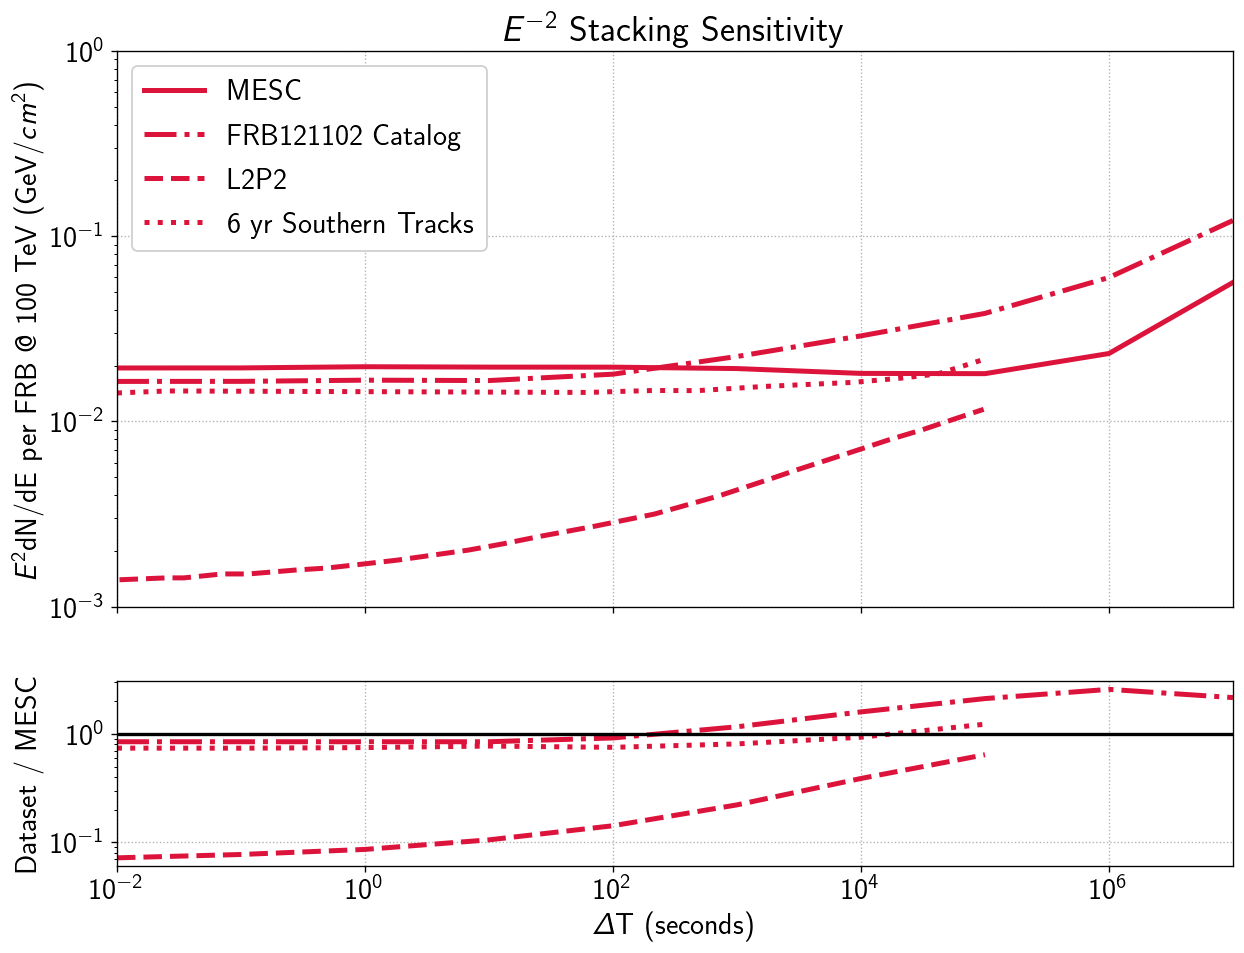

In [15]:
plt.rcParams.update({'font.size': 18})
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
ax1.plot(time_windows, sens_gamma_equals_2_perFRB, color = 'crimson', lw = 3, label = 'MESC')

ax1.plot(time_windows, sens_gamma_equals_2_perFRB121102, color = 'crimson', linestyle='dashdot', lw = 3, label = 'FRB121102 Catalog')

ax1.plot(L2P2_sens_gamma_equals_2_time, L2P2_sens_gamma_equals_2,  color = 'crimson', linestyle='--', lw = 3,label = r'L2P2')

ax1.plot(Tracks_6yr_sens_gamma_equals_2_time, Tracks_6yr_sens_gamma_equals_2,  color = 'crimson', linestyle=':', lw = 3, label = r'6 yr Southern Tracks')

ax1.set_ylim(.001, 1.0)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel(r'$E^{2}$dN/dE per FRB @ 100 TeV (GeV/$cm^{2}$)')
ax1.grid(True)
ax1.set_title(r'$E^{-2}$ Stacking Sensitivity')
ax1.patch.set_facecolor('white')
ax1.legend(loc = 'upper left', framealpha = 1)

ax2.plot(time_windows[:8], L2P2_sens_ratio_gamma_equals_2, color = 'crimson', linestyle='--', lw = 3, label = 'L2P2')
ax2.plot(time_windows[:8], Tracks_6yr_sens_ratio_gamma_equals_2, color = 'crimson', linestyle=':',lw = 3,label = '6 yr Southern Tracks')
ax2.plot(time_windows, catalog_sens_ratio_gamma_equals_2, color = 'crimson', linestyle='dashdot',lw = 3,label = '6 yr Southern Tracks')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(1e-2,1e7)
ax2.axhline(y=1., color = 'black')
ax2.grid()
ax2.set_ylabel('Dataset / MESC')
ax2.set_xlabel(r'$\Delta$T (seconds)' )

fig.patch.set_facecolor('white')
fig.savefig('/home/mkovacevich/public_html/Qual/E2_Stacking_Sensitivity.png', bbox_inches='tight')

In [17]:
#Loading discovery potentials for gamma = 3.0 
L2P2_3_sigma_gamma_equals_3_time = np.load('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_3_gamma_equals_3_time.npy', allow_pickle = True)
L2P2_3_sigma_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_3_gamma_equals_3_disc_pot.npy', allow_pickle = True)

L2P2_5_sigma_gamma_equals_3_time = np.load('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_5_gamma_equals_3_time.npy', allow_pickle = True)
L2P2_5_sigma_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_5_gamma_equals_3_disc_pot.npy', allow_pickle = True)

Tracks_6yr_3_sigma_gamma_equals_3_time = np.load('./Sensitivity_DiscoveryPotentials/6yr_nsigma_3_gamma_equals_3_time.npy', allow_pickle = True)
Tracks_6yr_3_sigma_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/6yr_nsigma_3_gamma_equals_3_disc_pot.npy', allow_pickle = True)

Tracks_6yr_5_sigma_gamma_equals_3_time = np.load('./Sensitivity_DiscoveryPotentials/6yr_nsigma_5_gamma_equals_3_time.npy', allow_pickle = True)
Tracks_6yr_5_sigma_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/6yr_nsigma_5_gamma_equals_3_disc_pot.npy', allow_pickle = True)

### Saving the discovery potential ratios
L2P2_3_sigma_ratio_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_3_ratio_gamma_equals_3_disc_pot.npy', allow_pickle = True)
L2P2_5_sigma_ratio_gamma_equals_3 =np.load('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_5_ratio_gamma_equals_3_disc_pot.npy', allow_pickle = True)

Tracks_6yr_3_ratio_sigma_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/6yr_nsigma_3_ratio_gamma_equals_3_disc_pot.npy', allow_pickle = True)
Tracks_6yr_5_ratio_sigma_gamma_equals_3 = np.load('./Sensitivity_DiscoveryPotentials/6yr_nsigma_5_ratio_gamma_equals_3_disc_pot.npy', allow_pickle = True)

# Saving the digitized values used to calculate the ratios for disc potentials (commented out unless explicitly needed)
'''
np.save('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_3_values_for_ratio_gamma_equals_3_disc_pot.npy', l2p2_gamma3_3sig_dp, allow_pickle = True)
np.save('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_5_values_ratio_gamma_equals_3_disc_pot.npy', l2p2_gamma3_5sig_dp, allow_pickle = True)

np.save('./Sensitivity_DiscoveryPotentials/6yr_nsigma_3__values_for_ratio_gamma_equals_2_disc_pot.npy', stracks_3sig_g3, allow_pickle = True)
np.save('./Sensitivity_DiscoveryPotentials/6yr_nsigma_5_values_for_ratio_gamma_equals_2_disc_pot.npy', stracks_5sig_g3, allow_pickle = True)
'''

"\nnp.save('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_3_values_for_ratio_gamma_equals_3_disc_pot.npy', l2p2_gamma3_3sig_dp, allow_pickle = True)\nnp.save('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_5_values_ratio_gamma_equals_3_disc_pot.npy', l2p2_gamma3_5sig_dp, allow_pickle = True)\n\nnp.save('./Sensitivity_DiscoveryPotentials/6yr_nsigma_3__values_for_ratio_gamma_equals_2_disc_pot.npy', stracks_3sig_g3, allow_pickle = True)\nnp.save('./Sensitivity_DiscoveryPotentials/6yr_nsigma_5_values_for_ratio_gamma_equals_2_disc_pot.npy', stracks_5sig_g3, allow_pickle = True)\n"

Below, Creating E^-3 discovery potential plot with L2P2 and 6 year southern tracks datasets

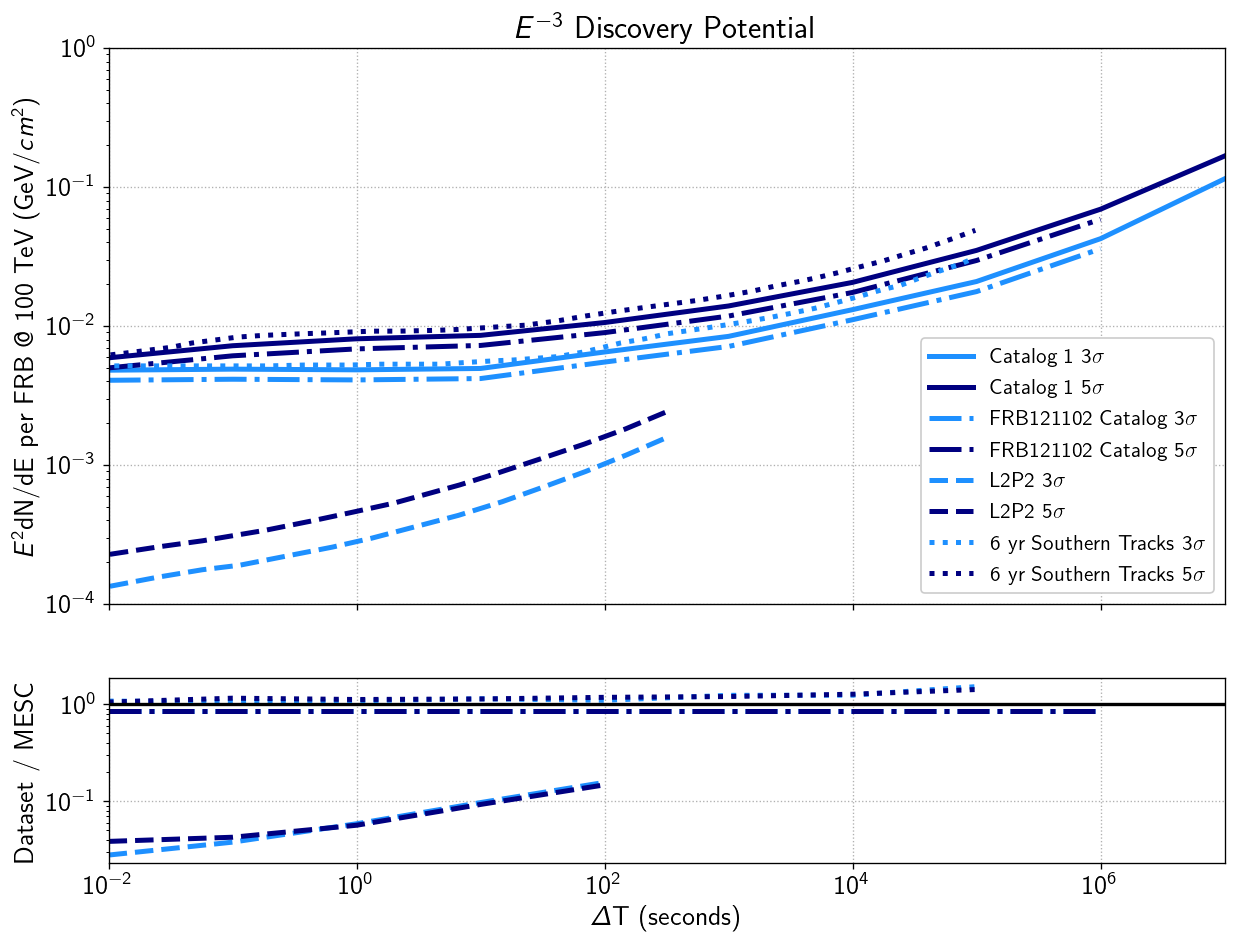

In [23]:
plt.rcParams.update({'font.size': 16})
gamma = 3.0
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)

ax1.plot(time_windows, three_sigma_gamma_equals_3_perFRB, color = 'dodgerblue', lw = 3,label = r'Catalog 1 3$\sigma$')
ax1.plot(time_windows, five_sigma_gamma_equals_3_perFRB, color = 'navy', lw = 3,label = r'Catalog 1 5$\sigma$')

ax1.plot(time_windows, three_sigma_gamma_equals_3_perFRB121102, color = 'dodgerblue', ls='dashdot', lw = 3,label = r'FRB121102 Catalog  3$\sigma$')
ax1.plot(time_windows, five_sigma_gamma_equals_3_perFRB121102, color = 'navy', lw = 3, ls='dashdot', label = r'FRB121102 Catalog 5$\sigma$')

ax1.plot(L2P2_3_sigma_gamma_equals_3_time, L2P2_3_sigma_gamma_equals_3, color = 'dodgerblue', lw = 3,linestyle='--', label = r'L2P2 3$\sigma$')
ax1.plot(L2P2_5_sigma_gamma_equals_3_time, L2P2_5_sigma_gamma_equals_3, color = 'navy', lw = 3,linestyle='--', label = r'L2P2 5$\sigma$')

ax1.plot(Tracks_6yr_3_sigma_gamma_equals_3_time, Tracks_6yr_3_sigma_gamma_equals_3, color = 'dodgerblue', linestyle=':',lw = 3,label = r'6 yr Southern Tracks 3$\sigma$')
ax1.plot(Tracks_6yr_5_sigma_gamma_equals_3_time, Tracks_6yr_5_sigma_gamma_equals_3, color = 'navy', linestyle=':',lw = 3,label = r'6 yr Southern Tracks 5$\sigma$')


ax1.set_ylim(.0001, 1.0)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel(r'$E^{2}$dN/dE per FRB @ 100 TeV (GeV/$cm^{2}$)')
ax1.grid(True)
ax1.set_title(r'$E^{-3}$ Discovery Potential')
ax1.patch.set_facecolor('white')
ax1.legend(loc = 'lower right' , framealpha = 1, prop={'size': 13})

ax2.plot(time_windows[:5],L2P2_3_sigma_ratio_gamma_equals_3, color = 'dodgerblue', linestyle='--', lw = 3,label = r'L2P2 3$\sigma$')
ax2.plot(time_windows[:5],L2P2_5_sigma_ratio_gamma_equals_3, color = 'navy', linestyle='--', lw = 3,label = r'L2P2 5$\sigma$')

ax2.plot(time_windows[:8],Tracks_6yr_3_ratio_sigma_gamma_equals_3, color = 'dodgerblue', linestyle=':',lw = 3,label = '6 yr Southern Tracks 3$\sigma$')
ax2.plot(time_windows[:8],Tracks_6yr_5_ratio_sigma_gamma_equals_3, color = 'navy', linestyle=':', lw = 3,label = '6 yr Southern Tracks 5$\sigma$')

ax2.plot(time_windows, catalog_nsigma_3_ratio_gamma_equals_3, color = 'dodgerblue', ls = 'dashdot', lw = 3,label = r'FRB121102 Catalog 3$\sigma$')
ax2.plot(time_windows, catalog_nsigma_5_ratio_gamma_equals_3, color = 'navy', ls = 'dashdot', lw = 3,label = r'FRB121102 Catalog 5$\sigma$')

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(1e-2, 1e7)
ax2.axhline(y=1.0, color='black')
ax2.grid()
ax2.set_ylabel('Dataset / MESC')
ax2.set_xlabel(r'$\Delta$T (seconds)' )

fig.patch.set_facecolor('white')

fig.savefig(f'/home/mkovacevich/public_html/Qual/E{gamma}DiscoveryPotentialComparisons.png', bbox_inches='tight')


In [24]:
#Loading discovery potentials for gamma = 3.0 
L2P2_3_sigma_gamma_equals_2_time = np.load('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_3_gamma_equals_2_time.npy', allow_pickle = True)
L2P2_3_sigma_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_3_gamma_equals_2_disc_pot.npy', allow_pickle = True)

L2P2_5_sigma_gamma_equals_2_time = np.load('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_5_gamma_equals_2_time.npy', allow_pickle = True)
L2P2_5_sigma_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_5_gamma_equals_2_disc_pot.npy', allow_pickle = True)

Tracks_6yr_3_sigma_gamma_equals_2_time = np.load('./Sensitivity_DiscoveryPotentials/6yr_nsigma_3_gamma_equals_2_time.npy', allow_pickle = True)
Tracks_6yr_3_sigma_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/6yr_nsigma_3_gamma_equals_2_disc_pot.npy', allow_pickle = True)

Tracks_6yr_5_sigma_gamma_equals_2_time = np.load('./Sensitivity_DiscoveryPotentials/6yr_nsigma_5_gamma_equals_2_time.npy', allow_pickle = True)
Tracks_6yr_5_sigma_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/6yr_nsigma_5_gamma_equals_2_disc_pot.npy', allow_pickle = True)

### Saving the discovery potential ratios
L2P2_3_sigma_ratio_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_3_ratio_gamma_equals_2_disc_pot.npy', allow_pickle = True)
L2P2_5_sigma_ratio_gamma_equals_2 =np.load('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_5_ratio_gamma_equals_2_disc_pot.npy', allow_pickle = True)

Tracks_6yr_3_ratio_sigma_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/6yr_nsigma_3_ratio_gamma_equals_2_disc_pot.npy', allow_pickle = True)
Tracks_6yr_5_ratio_sigma_gamma_equals_2 = np.load('./Sensitivity_DiscoveryPotentials/6yr_nsigma_5_ratio_gamma_equals_2_disc_pot.npy', allow_pickle = True)


# Saving the digitized values used to calculate the ratios for disc potentials (commented out unless needed)
'''
np.save('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_3_values_for_ratio_gamma_equals_2_disc_pot.npy', l2p2_gamma2_3sig_dp, allow_pickle = True)
np.save('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_5_values_ratio_gamma_equals_2_disc_pot.npy', l2p2_gamma2_5sig_dp, allow_pickle = True)

np.save('./Sensitivity_DiscoveryPotentials/6yr_nsigma_3__values_for_ratio_gamma_equals_2_disc_pot.npy', stracks_3sig_g2, allow_pickle = True)
np.save('./Sensitivity_DiscoveryPotentials/6yr_nsigma_5_values_for_ratio_gamma_equals_2_disc_pot.npy', stracks_5sig_g2, allow_pickle = True)
'''

"\nnp.save('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_3_values_for_ratio_gamma_equals_2_disc_pot.npy', l2p2_gamma2_3sig_dp, allow_pickle = True)\nnp.save('./Sensitivity_DiscoveryPotentials/L2P2_nsigma_5_values_ratio_gamma_equals_2_disc_pot.npy', l2p2_gamma2_5sig_dp, allow_pickle = True)\n\nnp.save('./Sensitivity_DiscoveryPotentials/6yr_nsigma_3__values_for_ratio_gamma_equals_2_disc_pot.npy', stracks_3sig_g2, allow_pickle = True)\nnp.save('./Sensitivity_DiscoveryPotentials/6yr_nsigma_5_values_for_ratio_gamma_equals_2_disc_pot.npy', stracks_5sig_g2, allow_pickle = True)\n"

Below, Creating E^-2 discovery potential plot with L2P2 and 6 year southern tracks datasets

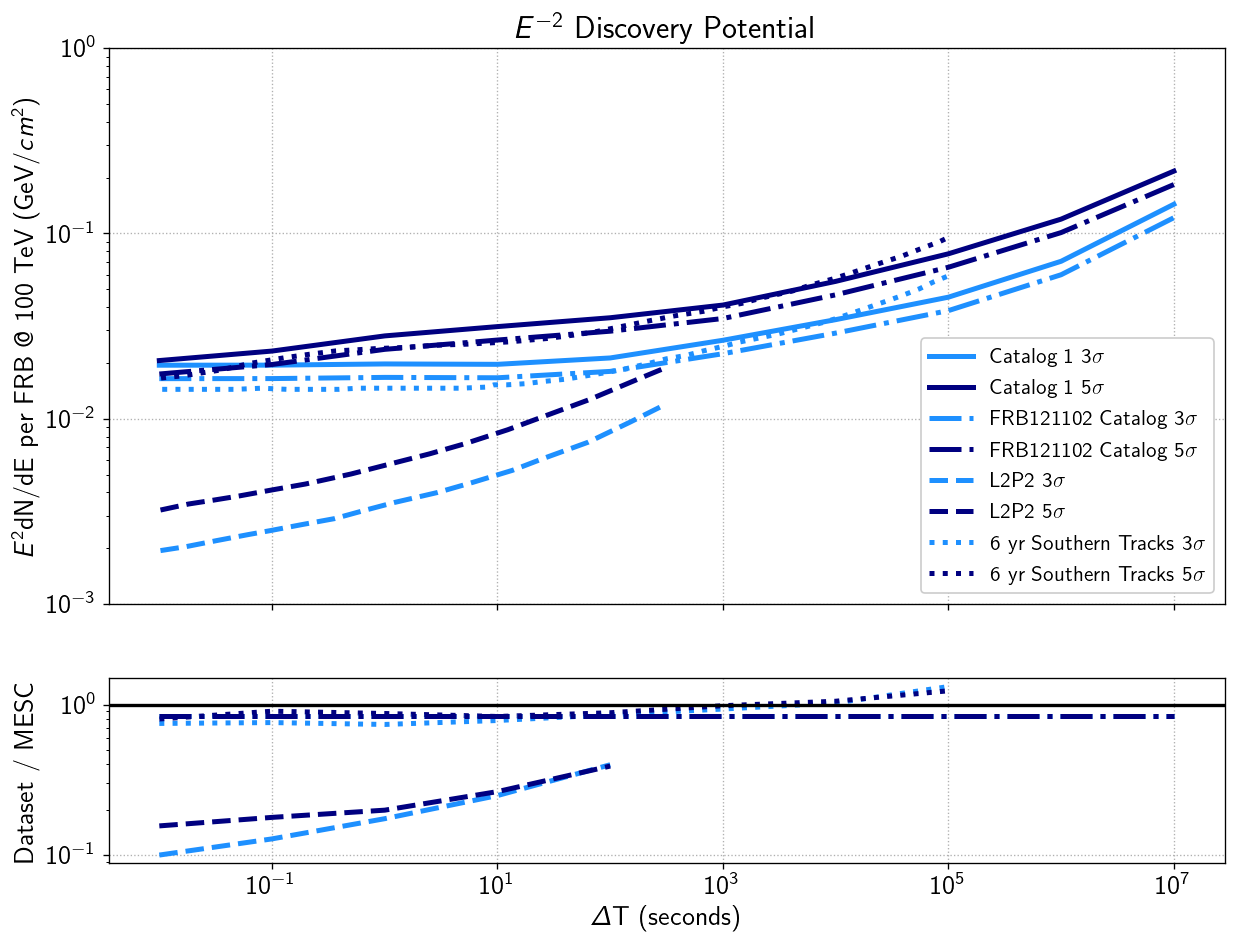

In [27]:
plt.rcParams.update({'font.size': 16})
gamma = 2.0
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)

ax1.plot(time_windows, three_sigma_gamma_equals_2_perFRB, color = 'dodgerblue', lw = 3,label = r'Catalog 1 3$\sigma$')
ax1.plot(time_windows, five_sigma_gamma_equals_2_perFRB, color = 'navy', lw = 3,label = r'Catalog 1 5$\sigma$')

ax1.plot(time_windows, three_sigma_gamma_equals_2_perFRB121102, color = 'dodgerblue', ls='dashdot', lw = 3,label = r'FRB121102 Catalog  3$\sigma$')
ax1.plot(time_windows, five_sigma_gamma_equals_2_perFRB121102, color = 'navy', lw = 3, ls='dashdot', label = r'FRB121102 Catalog 5$\sigma$')


ax1.plot(L2P2_3_sigma_gamma_equals_2_time, L2P2_3_sigma_gamma_equals_2, color = 'dodgerblue', lw = 3,linestyle='--', label = r'L2P2 3$\sigma$')
ax1.plot(L2P2_5_sigma_gamma_equals_2_time, L2P2_5_sigma_gamma_equals_2, color = 'navy', lw = 3,linestyle='--', label = r'L2P2 5$\sigma$')

ax1.plot(Tracks_6yr_3_sigma_gamma_equals_2_time, Tracks_6yr_3_sigma_gamma_equals_2, color = 'dodgerblue', linestyle=':',lw = 3,label = r'6 yr Southern Tracks 3$\sigma$')
ax1.plot(Tracks_6yr_5_sigma_gamma_equals_2_time, Tracks_6yr_5_sigma_gamma_equals_2, color = 'navy', linestyle=':',lw = 3,label = r'6 yr Southern Tracks 5$\sigma$')


ax1.set_ylim(.001, 1.0)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel(r'$E^{2}$dN/dE per FRB @ 100 TeV (GeV/$cm^{2}$)')

ax1.grid(True)
ax1.set_title(r'$E^{-2}$ Discovery Potential')
ax1.patch.set_facecolor('white')
ax1.legend(loc = 'lower right' , framealpha = 1, prop={'size': 13})

ax2.plot(time_windows[:5],L2P2_3_sigma_ratio_gamma_equals_2, color = 'dodgerblue', linestyle='--', lw = 3,label = r'L2P2 3$\sigma$')
ax2.plot(time_windows[:5],L2P2_5_sigma_ratio_gamma_equals_2, color = 'navy', linestyle='--', lw = 3,label = r'L2P2 5$\sigma$')

ax2.plot(time_windows[:8],Tracks_6yr_3_ratio_sigma_gamma_equals_2, color = 'dodgerblue', linestyle=':',lw = 3,label = '6 yr Southern Tracks 3$\sigma$')
ax2.plot(time_windows[:8],Tracks_6yr_5_ratio_sigma_gamma_equals_2, color = 'navy', linestyle=':', lw = 3,label = '6 yr Southern Tracks 5$\sigma$')

ax2.plot(time_windows, catalog_nsigma_3_ratio_gamma_equals_2, color = 'dodgerblue', ls = 'dashdot', lw = 3,label = r'FRB121102 Catalog 3$\sigma$')
ax2.plot(time_windows, catalog_nsigma_5_ratio_gamma_equals_2, color = 'navy', ls = 'dashdot', lw = 3,label = r'FRB121102 Catalog 5$\sigma$')

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.axhline(y=1.0, color='black')
ax2.grid()
ax2.set_ylabel('Dataset / MESC')
ax2.set_xlabel(r'$\Delta$T (seconds)' )
fig.patch.set_facecolor('white')

fig.savefig(f'/home/mkovacevich/public_html/Qual/E{gamma}DiscoveryPotentialComparisons.png', bbox_inches='tight')
